In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_excel('~/Downloads/house01.xls')
df = df[df['COD_OBL'] == 'Vinn'][['TOTALINC', 'AGE_HEAD', 'SLIV']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 3 columns):
TOTALINC    377 non-null float64
AGE_HEAD    377 non-null int64
SLIV        377 non-null float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [3]:
X = df[['AGE_HEAD', 'SLIV']]
Y = df['TOTALINC']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

/home/andrey/PycharmProjects/statlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOTALINC   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     17.69
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           4.58e-08
Time:                        21:15:05   Log-Likelihood:                -3554.7
No. Observations:                 377   AIC:                             7115.
Df Residuals:                     374   BIC:                             7127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6556.9094    648.463     10.111      0.000    5281.820    7831.999
AGE_HEAD     -48.5254      9.915     -4.894      0.000     -68.022     -29.029
SLIV          32.5005      8.574      3.790      0.000      15.641      49.360
==============================================================================
Omnibus:                      208.817   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1956.652
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                      13.286   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

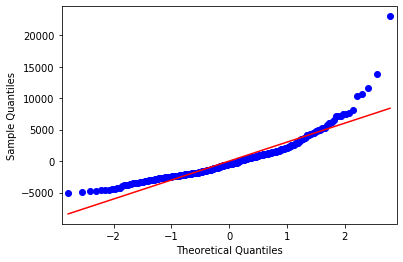

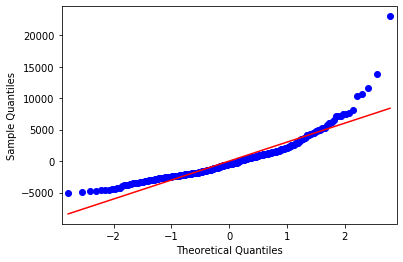

In [4]:
qqplot(results.resid, line='s')

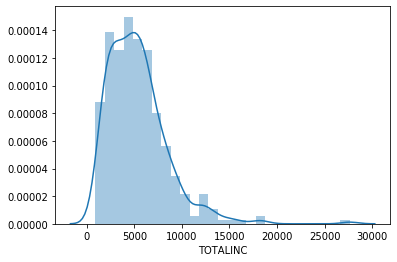

In [5]:
sns.distplot(df['TOTALINC'])

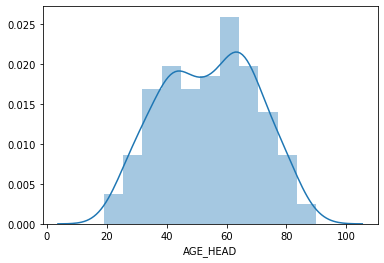

In [6]:
sns.distplot(df['AGE_HEAD'])

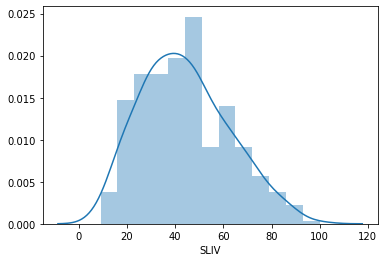

In [7]:
sns.distplot(df['SLIV'])

In [8]:
df['LogTOTALINC'] = np.log(df['TOTALINC'])

In [9]:
X = df[['AGE_HEAD', 'SLIV']]
Y = df['LogTOTALINC']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LogTOTALINC   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     29.12
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.77e-12
Time:                        21:18:04   Log-Likelihood:                -301.00
No. Observations:                 377   AIC:                             608.0
Df Residuals:                     374   BIC:                             619.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6932      0.116     75.068      0.000       8.466       8.921
AGE_HEAD      -0.0110      0.002     -6.237      0.000      -0.015      -0.008
SLIV           0.0075      0.002      4.921      0.000       0.005       0.011
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                2.586
Skew:                          -0.114   Prob(JB):                        0.274
Kurtosis:                       3.336   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
plt.rcParams['figure.figsize'] = (10,10)

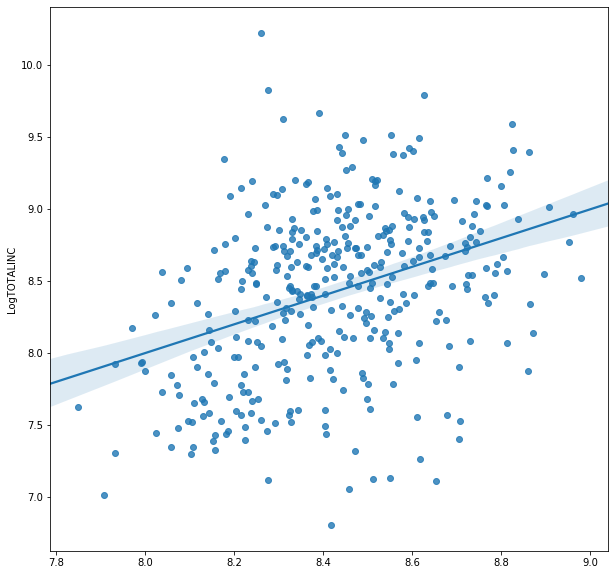

In [13]:
sns.regplot(results.fittedvalues, df['LogTOTALINC'])

Висновок:
lnCONSUM = 8.6932 + 0.0075 * SLIV - 0.0110 * AGE_HEAD + eps, eps~=Norm